In [2]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
import xesmf as xe

In [56]:
variables = [
    'U',
    'V',
    'SLP',
    'EFLUX',
    'LWTNET',
    'sf',
    'IWV',
]

fp_out_2 = '/rc_scratch/reba1583/variable_yr_files2/'
fp_out_3 = '/rc_scratch/reba1583/variable_yr_files3/'
variable_leadtimes = [
    0,0,0,0,96,48,0
]

def resample(file_name, index): 
    """
    Function to open the variable file at a single level and resample according training needs.
    This includes smoothing in time, lat, and lon. Also includes making LWTNET binary and 
    shifting variables to selected variable_leadtimes
    """
    data =  xr.open_mfdataset(fp_out_2+file_name)
    
    if variables[i] == 'sf':
        data = data.reindex(lat=list(reversed(data.lat)))
        
    data = data.resample(time = '6H').mean()
    
    if variable_leadtimes[index] !=0:
        data = data.shift(time = int(variable_leadtimes[index]/3), fill_value = np.nan)
    
    ds_out = xr.Dataset({"lat":(["lat"], np.linspace(variable_lats[index][0], variable_lats[index][1], 90), {"units": "degrees_north"}), "lon":(["lon"], np.arange(-180, 180, 2.5), {"units": "degrees_east"})})
    regridder = xe.Regridder(data, ds_out, "bilinear", periodic = True)
    ds_out = regridder(data, keep_attrs=True)


#     if variables[i] == 'LWTNET':
#         data = xr.where(data<220,2,0)
 
    ds_out.to_netcdf(fp_out_3+file_name+'.nc')

variable_lats = [
    [-75,-45],
    [-75,-45],
    [-75,-45],
    [-50,-20],
    [-20,0],
    [-90,0],
    [-70,-40]
]

In [ ]:
## UNET data - finer resolution, spatial Y
ds_1 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Training_data_UNET/full_data.nc', chunks ='auto')


In [ ]:
ds_1

In [3]:
## CNN data - coarse resolution, binary regional Y
ds_2 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/coarse_variable_data_files/train.nc', chunks ='auto')


In [4]:
newcolors = np.vstack((plt.get_cmap('Blues').reversed()(np.linspace(0, 1, 30)),np.ones((10,4)),
                       plt.get_cmap('Reds').reversed()(np.linspace(1, 0, 30))))
double = ListedColormap(newcolors, name='double')

In [7]:
#define function 
def show_sample(ds_sample):
    num_channels = len(ds_sample.n_channel)
    #define figure with 1 row and 5 columns. 
    fig,axes = plt.subplots(4,2,figsize=(25, 12))
    ax = axes.flatten() # Flatten 2x2 array so that you can use ax[0],ax[1],... rather than ax[0],ax[1]...
    fig.suptitle(str(ds_sample.time.values)[0:10]+' '+str(ds_sample.time.values)[11:13], fontsize = 20)
    #set the background to white, for some reason its transparent
    fig.set_facecolor('w')
    #loop over features (inputs)
    for i in range(num_channels):
        #plot images
        cf = ax[i].contourf(ds_sample.lon, ds_sample.lat, np.swapaxes(ds_sample.isel(n_channel = i).values, 0, 1),cmap=double, levels = np.arange(-4,4.5,.5), extend = 'both')
        ax[i].axis('off')
        ax[i].set_title(ds_sample.n_channel[i].values, fontsize = 18)
    cb = plt.colorbar(cf, ax =ax.ravel(),location='top', fraction = .05, shrink = 10,
                      ticks=[-4,-3,-2,-1, 0,1, 2,3,4],pad = .1,extendrect=True, aspect = 25, extend = 'both')



#     plt.savefig('/projects/reba1583/Research3/AntarcticAR_ML/Make_X_data/X_data_example.png', dpi = 300,facecolor = 'white', transparent=True, bbox_inches = 'tight') 


### One Timestep Example: Original Data

<ipython-input-7-e81272da5289>:16: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cf, ax =ax.ravel(),location='top', fraction = .05, shrink = 10,


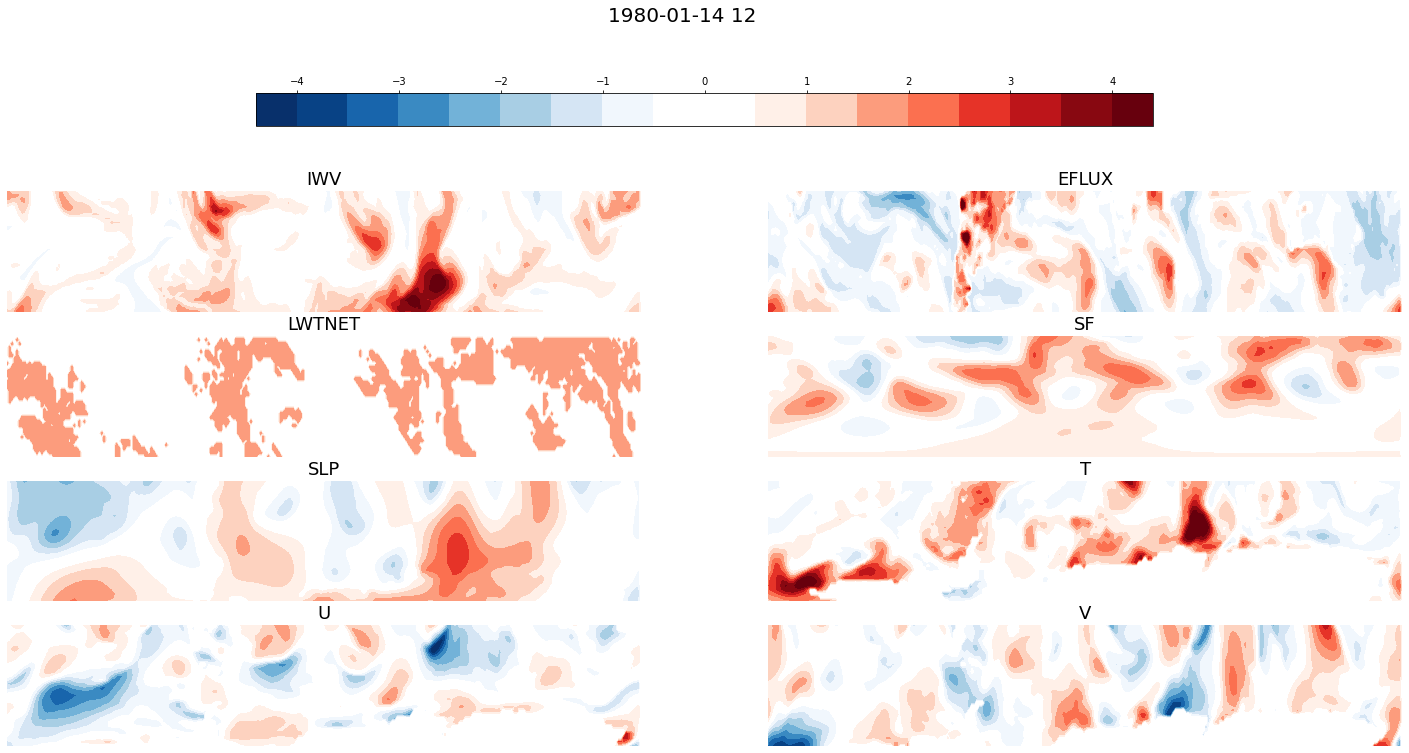

In [8]:
sample = ds_1.isel(time = 54).load()
show_sample(sample.features)

In [16]:
test

<xarray.DataArray 'SLP' (time: 8, lat: 181, lon: 576)>
dask.array<open_dataset-9d99e7f5863388fab9dddd659711007dSLP, shape=(8, 181, 576), dtype=float32, chunksize=(8, 181, 576), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 ... 1980-01-31T21:00:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 ... -1.5 -1.0 -0.5 -1.798e-13
Attributes:
    standard_name:   sea_level_pressure
    long_name:       sea_level_pressure
    units:           Pa
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

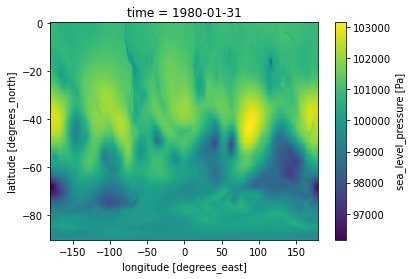

In [11]:
# test = test['SLP']
test.isel(time = 0).plot()

In [28]:
ds_out = xr.Dataset({
    "lat":(["lat"], np.linspace(-90,0,90), {"units": "degrees_north"}),
    "lon":(["lon"], np.arange(-180, 180, 2.5), {"units": "degrees_east"}),

})
ds_out

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 144)
Coordinates:
  * lat      (lat) float64 -90.0 -88.99 -87.98 -86.97 ... -2.022 -1.011 0.0
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
Data variables:
    *empty*

In [26]:
np.linspace(-90,0,90)

array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80.,
       -79., -78., -77., -76., -75., -74., -73., -72., -71., -70., -69.,
       -68., -67., -66., -65., -64., -63., -62., -61., -60., -59., -58.,
       -57., -56., -55., -54., -53., -52., -51., -50., -49., -48., -47.,
       -46., -45., -44., -43., -42., -41., -40., -39., -38., -37., -36.,
       -35., -34., -33., -32., -31., -30., -29., -28., -27., -26., -25.,
       -24., -23., -22., -21., -20., -19., -18., -17., -16., -15., -14.,
       -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
        -2.,  -1.,   0.])

In [27]:
np.arange(-90,1,1)

array([-90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78,
       -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65,
       -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52,
       -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26,
       -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0])

In [31]:
regridder = xe.Regridder(test, ds_out, "bilinear", periodic = True)


/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/dask/array/core.py:383: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


In [32]:
ds_out_test = regridder(test, keep_attrs=True)
ds_out_test

/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/xesmf/frontend.py:534: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


<xarray.DataArray 'SLP' (time: 8, lat: 90, lon: 144)>
dask.array<transpose, shape=(8, 90, 144), dtype=float64, chunksize=(8, 90, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 ... 1980-01-31T21:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -88.99 -87.98 -86.97 ... -2.022 -1.011 0.0
Attributes:
    standard_name:   sea_level_pressure
    long_name:       sea_level_pressure
    units:           Pa
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    regrid_method:   bilinear

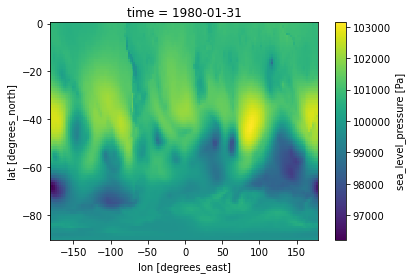

In [33]:
ds_out_test.isel(time = 0).plot()

### Same Timestep Example: Coarsened Data used for training

In [ ]:
trainig_data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/coarse_variable_data_files/train.nc')
training_sample = trainig_data.sel(time=str(sample.time.values), method = 'nearest').features.load()
show_sample(training_sample)

(-180.0, 180.0, -80.0, -50.0)

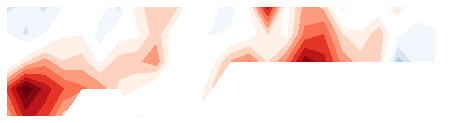

In [150]:
test = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files4/T')
test = test.sel(time=str(sample.time.values), method = 'nearest').T

fig,ax = plt.subplots(1,1,figsize=(8, 2))
fig.set_facecolor('w')
#loop over features (inputs)

ax.contourf(test.lon,test.lat, test,cmap=double, levels = np.arange(-4,4.5,.5), extend = 'both')
ax.axis('off')


(-180.0, 180.0, -75.0, -45.0)

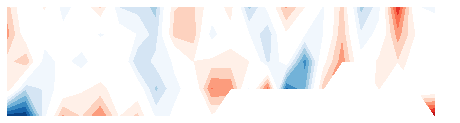

(-180.0, 180.0, -30.0, 0.0)

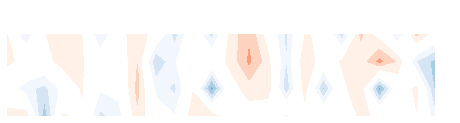

In [151]:
test = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files4/LWTNET')
test = test.sel(time=str(sample.time.values), method = 'nearest').LWTNET

fig,ax = plt.subplots(1,1,figsize=(8, 2))
fig.set_facecolor('w')
#loop over features (inputs)

ax.contourf(test.lon,test.lat, test,cmap=double, levels = np.arange(-4,4.5,.5), extend = 'both')
ax.axis('off')


In [194]:
test = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files3/EFLUX_1980.nc')
test

<xarray.Dataset>
Dimensions:  (lon: 576, lat: 181, time: 8784)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 ... -1.5 -1.0 -0.5 -1.798e-13
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 1980-12-31T23:30:00
Data variables:
    EFLUX    (time, lat, lon) float32 dask.array<chunksize=(8784, 181, 576), meta=np.ndarray>
Attributes: (12/33)
    CDI:                               Climate Data Interface version 1.8.1 (...
    history:                           Mon Mar 04 19:15:48 2024: cdo -select,...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.2 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.8.1 (...

In [195]:
test = test.isel(time = slice(5,8)).load()
# test.to_netcdf('/rc_scratch/reba1583/variable_yr_files3.5/test.nc')

In [199]:
test3 = test.EFLUX.round(2)
test3

<xarray.DataArray 'EFLUX' (time: 3, lat: 181, lon: 576)>
array([[[ 2.0000e-01,  2.0000e-01,  2.0000e-01, ...,  2.0000e-01,
          2.0000e-01,  2.0000e-01],
        [-2.0000e-02, -2.0000e-02, -2.0000e-02, ..., -2.0000e-02,
         -2.0000e-02, -2.0000e-02],
        [ 1.7000e-01,  1.7000e-01,  1.5000e-01, ...,  2.1000e-01,
          2.0000e-01,  1.8000e-01],
        ...,
        [ 1.1890e+02,  1.1687e+02,  1.0315e+02, ...,  1.1468e+02,
          1.1146e+02,  1.1443e+02],
        [ 1.1259e+02,  1.1671e+02,  1.0565e+02, ...,  1.0587e+02,
          1.0556e+02,  1.0637e+02],
        [ 1.0640e+02,  1.0959e+02,  1.0434e+02, ...,  1.0600e+02,
          1.0553e+02,  1.0406e+02]],

       [[ 1.0000e-01,  1.0000e-01,  1.0000e-01, ...,  1.0000e-01,
          1.0000e-01,  1.0000e-01],
        [-8.0000e-02, -8.0000e-02, -8.0000e-02, ..., -8.0000e-02,
         -8.0000e-02, -8.0000e-02],
        [ 4.2000e-01,  4.0000e-01,  3.8000e-01, ...,  4.5000e-01,
          4.3000e-01,  4.2000e-01],
...
        [ 1.1665e+02,  1.1249e+02,  9.7650e+01, ...,  1.1468e+02,
          1.1118e+02,  1.1324e+02],
        [ 1.1259e+02,  1.1446e+02,  9.8310e+01, ...,  1.0681e+02,
          1.0587e+02,  1.0674e+02],
        [ 1.0571e+02,  1.0824e+02,  9.8310e+01, ...,  1.0777e+02,
          1.0584e+02,  1.0381e+02]],

       [[ 4.0000e-02,  4.0000e-02,  4.0000e-02, ...,  4.0000e-02,
          4.0000e-02,  4.0000e-02],
        [-1.2000e-01, -1.2000e-01, -1.2000e-01, ..., -1.0000e-01,
         -1.0000e-01, -1.0000e-01],
        [ 4.6000e-01,  4.6000e-01,  4.4000e-01, ...,  4.9000e-01,
          4.7000e-01,  4.7000e-01],
        ...,
        [ 1.1293e+02,  1.0737e+02,  9.1900e+01, ...,  1.1333e+02,
          1.1033e+02,  1.1165e+02],
        [ 1.1083e+02,  1.1002e+02,  9.0460e+01, ...,  1.0721e+02,
          1.0558e+02,  1.0637e+02],
        [ 1.0362e+02,  1.0524e+02,  9.1010e+01, ...,  1.0908e+02,
          1.0527e+02,  1.0246e+02]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 ... -1.5 -1.0 -0.5 -1.798e-13
  * time     (time) datetime64[ns] 1980-01-01T05:30:00 ... 1980-01-01T07:30:00
Attributes:
    standard_name:   total_latent_energy_flux
    long_name:       total_latent_energy_flux
    units:           W m-2
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [200]:
test3.to_netcdf('/rc_scratch/reba1583/variable_yr_files3.5/test3.nc')

In [190]:
test.isel(time=0).values

array([[ 1.99000e-01,  1.99000e-01,  1.99000e-01, ...,  1.99000e-01,
         1.99000e-01,  1.99000e-01],
       [-1.90000e-02, -1.90000e-02, -1.90000e-02, ..., -1.90000e-02,
        -1.90000e-02, -1.90000e-02],
       [ 1.68000e-01,  1.68000e-01,  1.52000e-01, ...,  2.15000e-01,
         1.99000e-01,  1.84000e-01],
       ...,
       [ 1.18902e+02,  1.16871e+02,  1.03152e+02, ...,  1.14684e+02,
         1.11465e+02,  1.14434e+02],
       [ 1.12590e+02,  1.16715e+02,  1.05652e+02, ...,  1.05871e+02,
         1.05559e+02,  1.06371e+02],
       [ 1.06402e+02,  1.09590e+02,  1.04340e+02, ...,  1.05996e+02,
         1.05527e+02,  1.04059e+02]], dtype=float32)

In [205]:
test

<xarray.Dataset>
Dimensions:  (lon: 576, lat: 181, time: 3)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 ... -1.5 -1.0 -0.5 -1.798e-13
  * time     (time) datetime64[ns] 1980-01-01T05:30:00 ... 1980-01-01T07:30:00
Data variables:
    EFLUX    (time, lat, lon) float32 0.1994 0.1994 0.1994 ... 109.1 105.3 102.5
Attributes: (12/33)
    CDI:                               Climate Data Interface version 1.8.1 (...
    history:                           Mon Mar 04 19:15:48 2024: cdo -select,...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.2 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.8.1 (...

In [219]:
np.around(test4, 3)

<xarray.DataArray 'EFLUX' (time: 3, lat: 181, lon: 576)>
array([[[ 1.99000e-01,  1.99000e-01,  1.99000e-01, ...,  1.99000e-01,
          1.99000e-01,  1.99000e-01],
        [-1.90000e-02, -1.90000e-02, -1.90000e-02, ..., -1.90000e-02,
         -1.90000e-02, -1.90000e-02],
        [ 1.68000e-01,  1.68000e-01,  1.52000e-01, ...,  2.15000e-01,
          1.99000e-01,  1.84000e-01],
        ...,
        [ 1.18902e+02,  1.16871e+02,  1.03152e+02, ...,  1.14684e+02,
          1.11465e+02,  1.14434e+02],
        [ 1.12590e+02,  1.16715e+02,  1.05652e+02, ...,  1.05871e+02,
          1.05559e+02,  1.06371e+02],
        [ 1.06402e+02,  1.09590e+02,  1.04340e+02, ...,  1.05996e+02,
          1.05527e+02,  1.04059e+02]],

       [[ 1.03000e-01,  1.03000e-01,  1.03000e-01, ...,  1.03000e-01,
          1.03000e-01,  1.03000e-01],
        [-8.50000e-02, -8.50000e-02, -8.50000e-02, ..., -8.50000e-02,
         -8.50000e-02, -8.50000e-02],
        [ 4.15000e-01,  4.00000e-01,  3.84000e-01, ...,  4.47000e-01,
          4.31000e-01,  4.15000e-01],
...
        [ 1.16650e+02,  1.12494e+02,  9.76500e+01, ...,  1.14681e+02,
          1.11181e+02,  1.13244e+02],
        [ 1.12587e+02,  1.14462e+02,  9.83060e+01, ...,  1.06806e+02,
          1.05869e+02,  1.06744e+02],
        [ 1.05712e+02,  1.08244e+02,  9.83060e+01, ...,  1.07775e+02,
          1.05837e+02,  1.03806e+02]],

       [[ 3.70000e-02,  3.70000e-02,  3.70000e-02, ...,  3.70000e-02,
          3.70000e-02,  3.70000e-02],
        [-1.19000e-01, -1.19000e-01, -1.19000e-01, ..., -1.04000e-01,
         -1.04000e-01, -1.04000e-01],
        [ 4.59000e-01,  4.59000e-01,  4.43000e-01, ...,  4.90000e-01,
          4.75000e-01,  4.75000e-01],
        ...,
        [ 1.12928e+02,  1.07365e+02,  9.18960e+01, ...,  1.13334e+02,
          1.10334e+02,  1.11646e+02],
        [ 1.10834e+02,  1.10021e+02,  9.04590e+01, ...,  1.07209e+02,
          1.05584e+02,  1.06365e+02],
        [ 1.03615e+02,  1.05240e+02,  9.10060e+01, ...,  1.09084e+02,
          1.05271e+02,  1.02459e+02]]])
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 ... -1.5 -1.0 -0.5 -1.798e-13
  * time     (time) datetime64[ns] 1980-01-01T05:30:00 ... 1980-01-01T07:30:00
Attributes:
    standard_name:   total_latent_energy_flux
    long_name:       total_latent_energy_flux
    units:           W m-2
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [213]:
test4['EFLUX'] = np.round(test4.values, 4)

# test4 = test.EFLUX.astype('f8')
test4

MissingDimensionsError: cannot set variable 'EFLUX' with 3-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [208]:
test4.to_netcdf('/rc_scratch/reba1583/variable_yr_files3.5/test4.nc')

TypeError: illegal primitive data type, must be one of dict_keys(['S1', 'i1', 'u1', 'i2', 'u2', 'i4', 'u4', 'i8', 'u8', 'f4', 'f8']), got float16

In [220]:
import os

In [11]:
for y in range(1980,2020):
    command = 'cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_'+str(y)+'* /rc_scratch/reba1583/variable_yr_files3.5/IWV_'+str(y)
    print(command)


cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_1980* /rc_scratch/reba1583/variable_yr_files3.5/IWV_1980
cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_1981* /rc_scratch/reba1583/variable_yr_files3.5/IWV_1981
cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_1982* /rc_scratch/reba1583/variable_yr_files3.5/IWV_1982
cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_1983* /rc_scratch/reba1583/variable_yr_files3.5/IWV_1983
cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_1984* /rc_scratch/reba1583/variable_yr_files3.5/IWV_1984
cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_1985* /rc_scratch/reba1583/variable_yr_files3.5/IWV_1985
cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/reba1583/variable_yr_files3/IWV_1986* /rc_scratch/reba1583/variable_yr_files3.5/IWV_1986
cdo sellonlatbox,-180,180,-70,-40, /rc_scratch/r

In [224]:



command

'cdo sellonlatbox,-180,180,-50,-20, /rc_scratch/reba1583/variable_yr_files3/EFLUX_2019* /rc_scratch/reba1583/variable_yr_files3.5/EFLUX_2019*'

In [ ]:
# in order to run Make_std_anomalies I had to run cdo commands selecting the latitudes I want to use for EFLUX, 
# otherwise I ran out of memory
